<h1>Лабораторна робота №4<br>                                                                   
Структури для роботи з великими обсягами даних в Python</h1>

<h5>Виконав студент групи ФБ-24<br>
Демченко Олександр</h5>



<h5>Мета: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)
Основні поняття: numpy масиви, кортежі, списки, фрейми, профілювання.<br>

Теоретичні відомості

Мінімально необхідні навички роботи із масивами та фреймами вже
отримано при виконанні лабораторних робіт 1 та 2.
За потреби можна скористатись офіційними сторінками відповідних проектів:
1) http://pandas.pydata.org/pandas-docs/version/0.15.2/index.html
2) https://docs.scipy.org/doc/scipy/</h5>

In [17]:
import os
import time
import urllib.request
from datetime import datetime
import zipfile
import pandas as pd
import numpy as np 
import missingno as ms
print("Setup")

Setup


Download data

In [18]:
def download_csv(directory):
    url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
    retries = 3
    for attempt in range(retries):
        try:
            with urllib.request.urlopen(url) as wp:
                text = wp.read()
            break
        except urllib.error.URLError as e:
            print(f"Error downloading data: {e}")
            if attempt < retries - 1:
                print(f"Retrying download in 5 seconds...")
                time.sleep(5)
            else:
                print(f"Failed to download data after {retries} attempts.")
                continue

    filename = f'Individual_Household_Electric_Power_Consumption.zip'
    filepath = os.path.join(directory, filename)

    try:
        with open(filepath, 'wb') as out:
            out.write(text)
        print(f"Process is downloading:\nfile_zip:{filename}...\n")
        print(f"File_zip:{filename} downloaded successfully.")
        print("=" * 80)
    except IOError as e:
        print(f"Error writing file {filename}: {e}")

def unzip(directory):
    zip_file = os.path.join(directory, "Individual_Household_Electric_Power_Consumption.zip")
    with zipfile.ZipFile(zip_file, 'r') as zip_data:
        zip_data.extractall(path=directory)
        for filename in zip_data.namelist():
            if filename.endswith('.txt'):
                new_filename = 'individual_household_electric_power_consumption_2006_2010.csv'
                os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
            if os.path.exists(zip_file):
                os.unlink(zip_file)
        print(f"Files extracted and renamed {new_filename} successfully.")

def clean_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("[+] Directory created successfully.")

    if input("Do you want to clean the directory? (y/n): ").lower() == 'y':
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            if os.path.exists(filepath):
                os.unlink(filepath)
        print("[+] Directory cleaned successfully.\n")
    else:
        print("[+] Directory cleaning skipped.\n")

In [19]:
directory="/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/Individual_Household_Electric_Power_Consumption_Data/"
clean_directory(directory)
download_csv(directory)
unzip(directory)

[+] Directory cleaned successfully.

Process is downloading:
file_zip:Individual_Household_Electric_Power_Consumption.zip...

File_zip:Individual_Household_Electric_Power_Consumption.zip downloaded successfully.
Files extracted and renamed individual_household_electric_power_consumption_2006_2010.csv successfully.


To_csv with pandas

In [20]:
def read_to_csv(filepath, delimiter=';'):  
    try:
        data_frame = pd.read_csv(filepath, delimiter=delimiter)
        data_frame.to_csv(filepath, index=False)
        data_frame.info()
    except Exception as e:
        print(f"Error reading CSV file: {e}")

In [21]:
filepath = "/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/Individual_Household_Electric_Power_Consumption_Data/individual_household_electric_power_consumption_2006_2010.csv"
read_to_csv(filepath)

/tmp/ipykernel_2303/2938010626.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv(filepath, delimiter=delimiter)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


To read_csv with numpy

In [22]:
def read_with_numpy(filepath, delimiter=';', save_csv=False, save_path=None):
    try:
        data_numpy = np.genfromtxt(filepath, delimiter=delimiter, dtype=None, encoding=None)
        if save_csv and save_path is not None:
            np.savetxt(save_path, data_numpy, delimiter=',', fmt='%s')
            print("Data saved to CSV file:", save_path)
        
        return data_numpy
    
    except Exception as e:
        print(f"Error reading CSV file with NumPy: {e}")
        return None

In [23]:
filepath = "/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/Individual_Household_Electric_Power_Consumption_Data/individual_household_electric_power_consumption_2006_2010.csv"
read_with_numpy(filepath)

array(['Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3',
       '16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0',
       '16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0',
       ..., '26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0',
       '26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0',
       '26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0'],
      dtype='<U121')

Data cleaning

Також варто звернути увагу на те, що дані, як і практично все в реальному житті, можуть потребувати Вашої уваги  - потрібно залишити лише ті
спостереження, в яких немає порожніх спостережень (порожні значення – пусті поля між роздільником – ? – 28.04.2007, як приклад).

In [24]:
def data_cleaning(filepath):
    Dtype = {
        'Global_active_power': float,
        'Global_reactive_power': float,
        'Voltage': float,
        'Global_intensity': float,
        'Sub_metering_1': float,
        'Sub_metering_2': float,
        'Sub_metering_3': float
    }
    data_frame = pd.read_csv(filepath, dtype=Dtype, na_values='?')
    ms.matrix(data_frame)
    data_frame.dropna(inplace=True)
    data_frame['Date'] = pd.to_datetime(data_frame['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    data_frame['Time'] = pd.to_datetime(data_frame['Time'], format='%H:%M:%S').dt.time
    data_frame_numpy = data_frame.to_numpy()
    
    return data_frame, data_frame_numpy 

<h4>print Data Frame and Numpy array</h4>

Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:24:00 |        4.216        |         0.418         | 234.84  |       18.4       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:25:00 |        5.36         |         0.436         | 233.63  |       23.0       |      0.0       |      1.0       |      16.0      |
| 2006-12-16 | 17:26:00 |        5.374        |         0.498         | 233.29  |       23.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:27:00 |        5.388        |         0.502

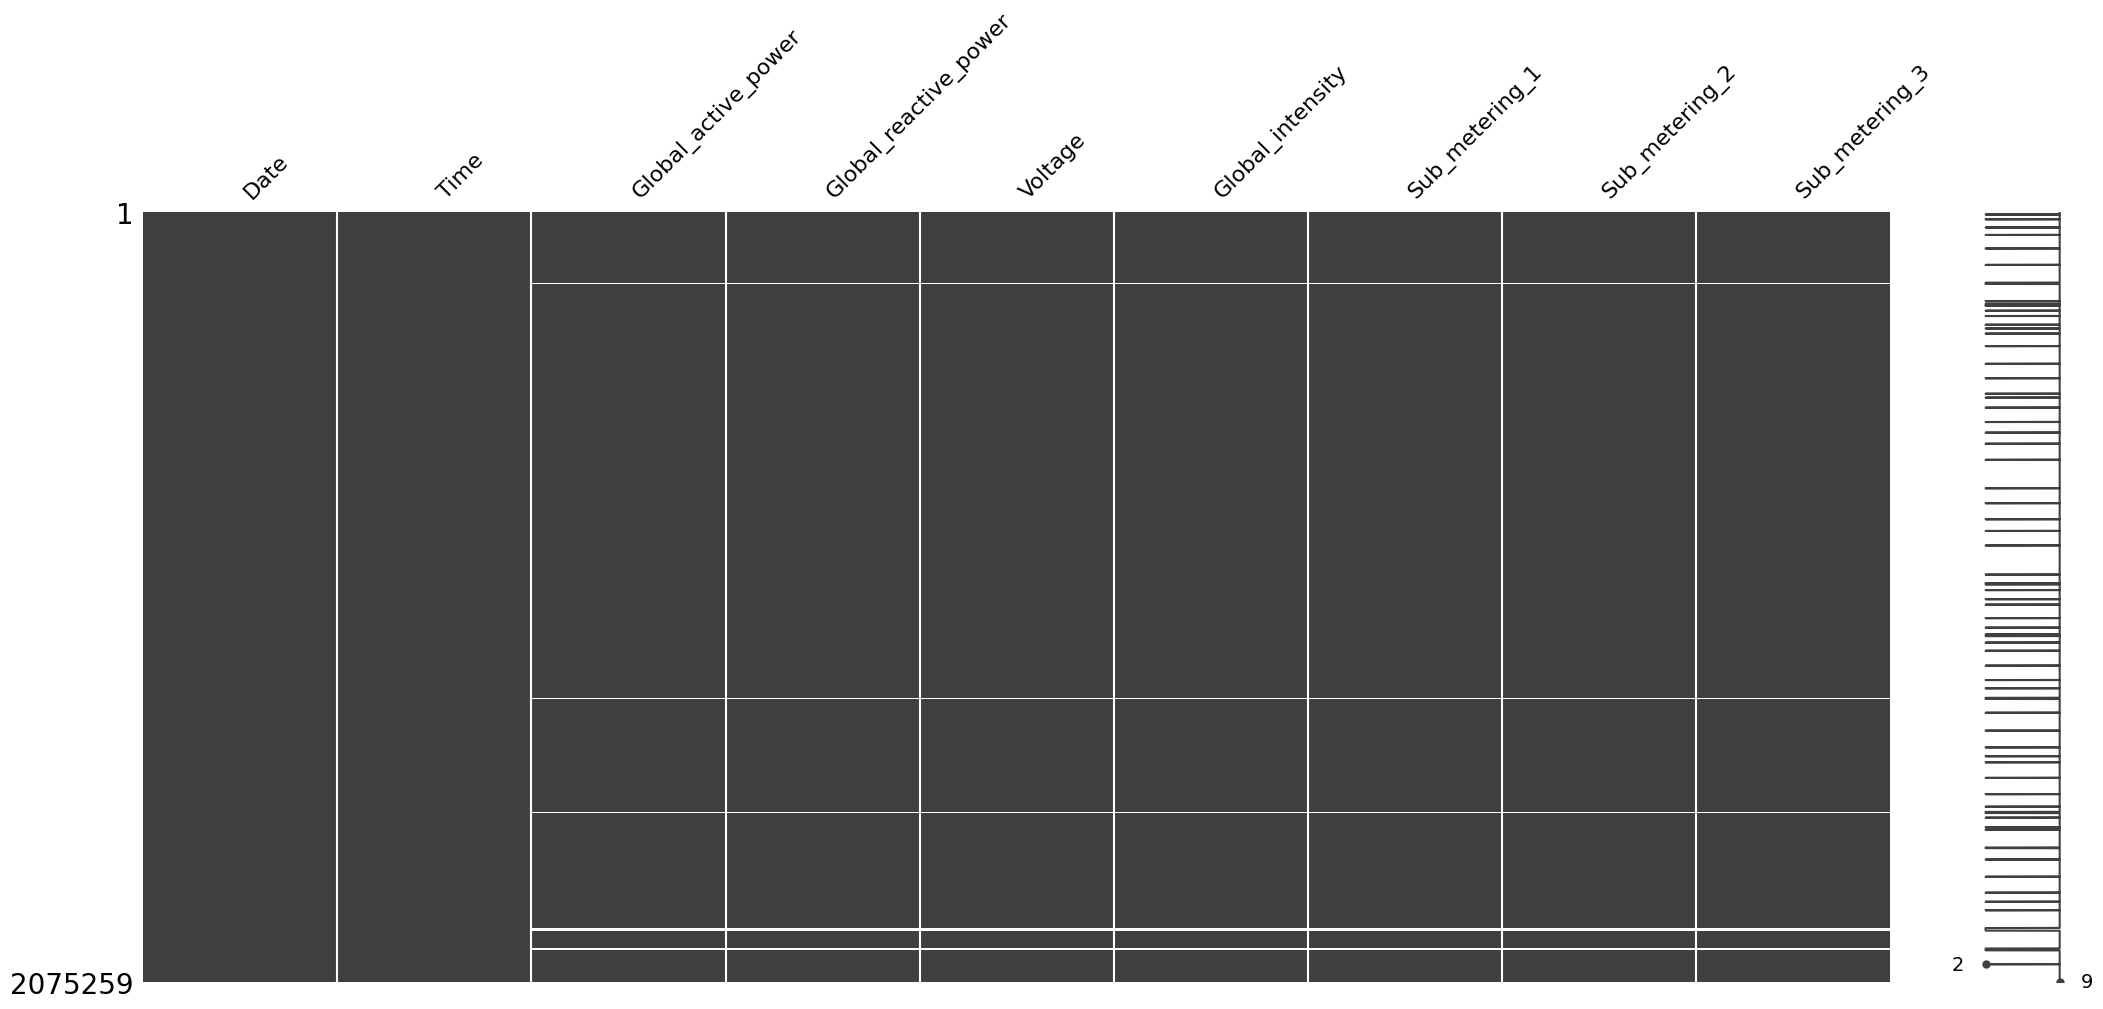

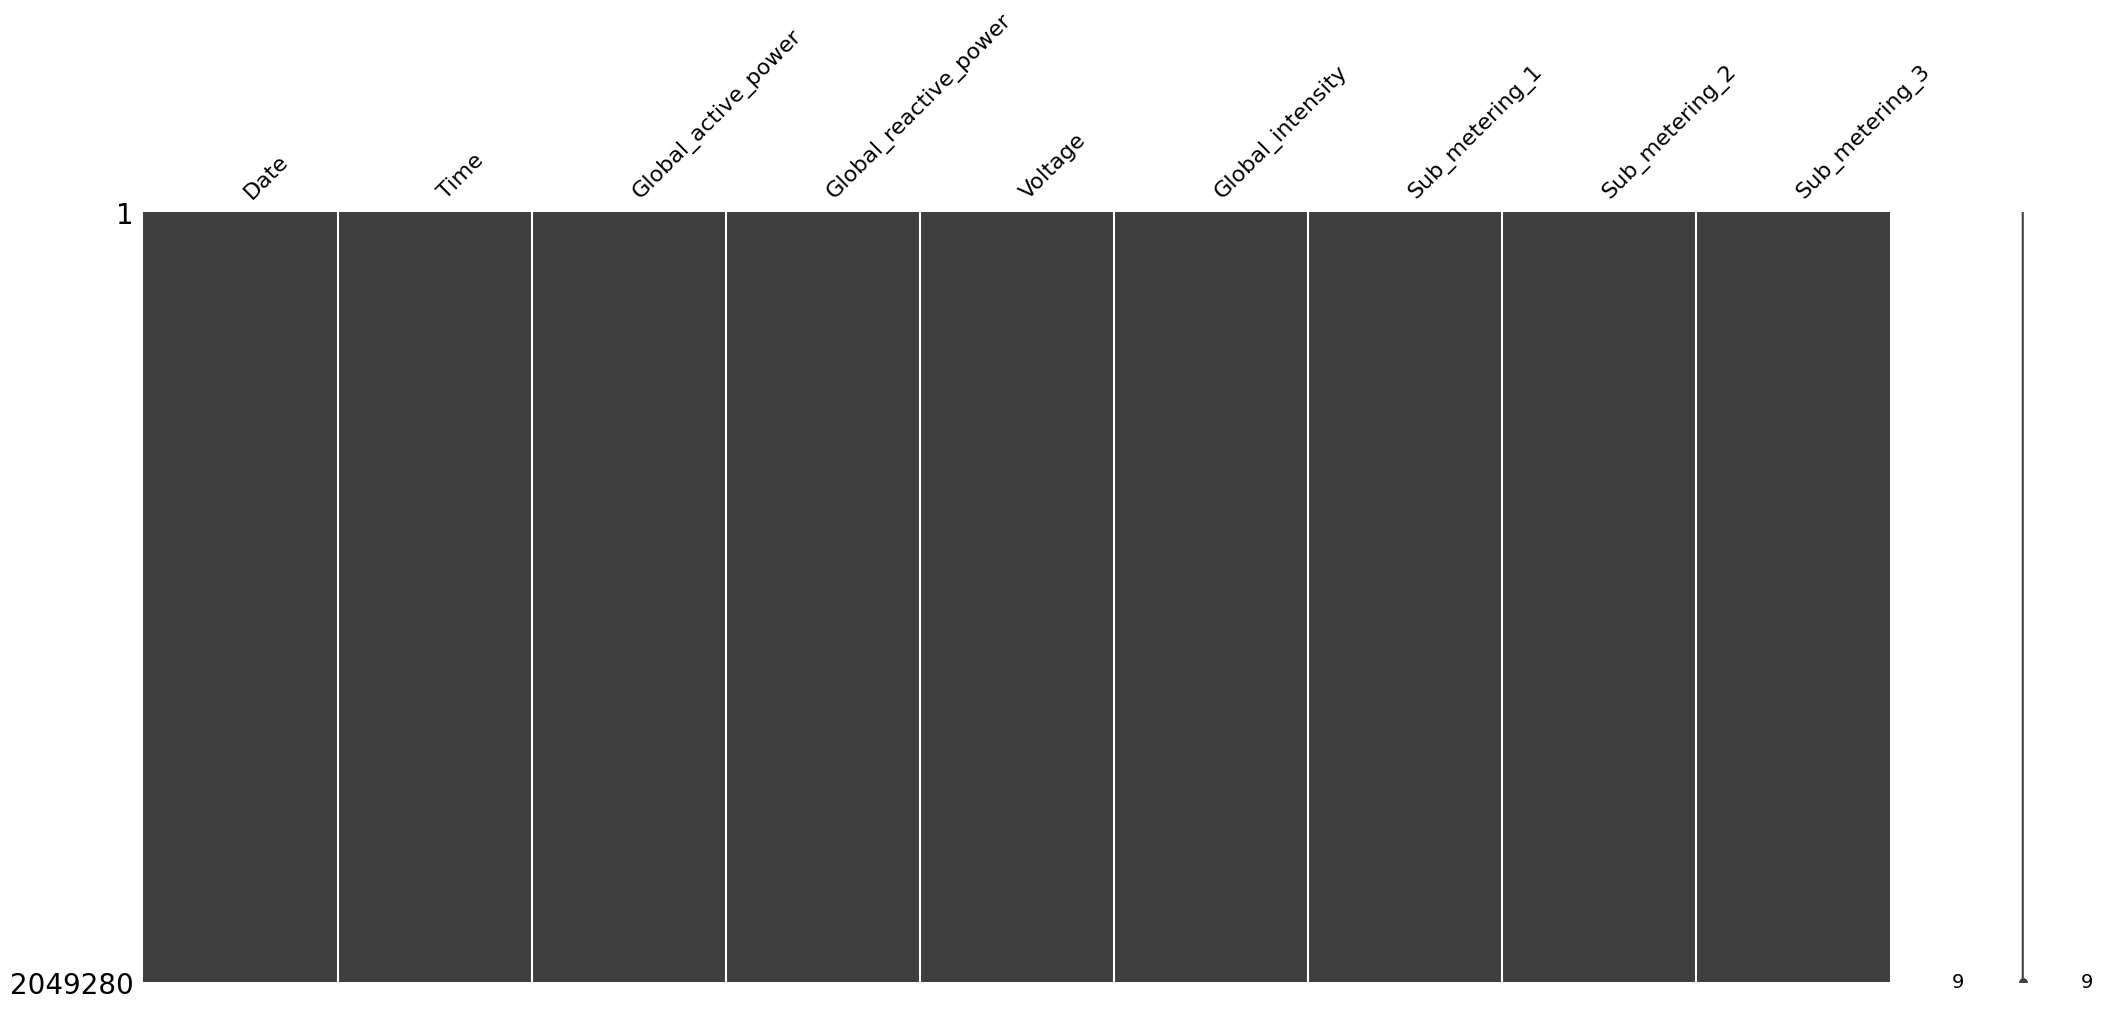

In [25]:
filepath = "/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/Individual_Household_Electric_Power_Consumption_Data/individual_household_electric_power_consumption_2006_2010.csv"
from tabulate import tabulate
cleaned_data_frame, cleaned_data_frame_numpy = data_cleaning(filepath)

def print_head(data):
    if isinstance(data, pd.DataFrame):
        table_data = data.head(15).values.tolist()
        headers = data.columns.tolist()
        print("Перші 15 рядків DataFrame:")
        print(tabulate(table_data, headers=headers, tablefmt='pretty'))
    elif isinstance(data, np.ndarray):
        table_data = data[:15].tolist()
        print("Перші 15 рядків NumPy масиву:")
        print(tabulate(table_data, tablefmt='pretty'))
    else:
        print("Непідтримуваний тип даних. Підтримуються лише DataFrame або NumPy масив.")

ms.matrix(cleaned_data_frame)

print_head(cleaned_data_frame)
print_head(cleaned_data_frame_numpy)


<h3> Перелік атрибутивної інформації: </h3>
1) date: дата виміру у форматі dd/mm/yyyy<br>
2) time: час у форматі hh:mm:ss<br>
3) global_active_power: активна потужність, яку споживаєдомогосподарство за хвилину (усереднено) [кВт]<br>
4) global_reactive_power: реактивна потужність, яку споживає домогосподарство за хвилину (усереднено) [кВт]<br>
5) voltage: напруга, усереднена за хвилину спостереження [В]<br>
6) global_intensity: усереднена силу струму для домогосподарства [A]<br>
7) sub_metering_1: набір споживачів енергії No1 [Вт-годин активної енергії], відповідає кухні, на якій є машина для миття<br> посуду на мікрохвильовка (електричної плити немає, використовується газова).<br>
8) sub_metering_2: набір споживачів енергії No2 [Вт-годин активної енергії], відповіє пральні, в якій працює пральна машина,сушарка, холодильних та ввімкнено світло.<br>
10) sub_metering_3: набір споживачів енергії No3 [Вт-годин активної енергії], відповідає бойлеру та кондиціонеру.<br>

<h3> Завдання першого рівня </h3>

<h4>Numpy and DataFrame</h4>

1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [26]:
def household_df(cleaned_data_frame):
    start_time = time.time()
    active_power_df = cleaned_data_frame[cleaned_data_frame["Global_active_power"] > 5.0] 
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для DataFrame:", execution_time)
    return active_power_df

def household_numpy(cleaned_data_frame_numpy):
    start_time = time.time()
    indices = np.where(cleaned_data_frame_numpy[:, 2] > 5)
    active_power_np = cleaned_data_frame_numpy[indices]
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    return active_power_np


In [27]:
household_df_result = household_df(cleaned_data_frame)
household_numpy_result = household_numpy(cleaned_data_frame_numpy)
print_head(household_df_result)
print_head(household_numpy_result) 

Час виконання для DataFrame: 0.011866092681884766
Час виконання для NumPy: 0.04730510711669922
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:25:00 |        5.36         |         0.436         | 233.63  |       23.0       |      0.0       |      1.0       |      16.0      |
| 2006-12-16 | 17:26:00 |        5.374        |         0.498         | 233.29  |       23.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:27:00 |        5.388        |         0.502         | 233.74  |       23.0       |      0.0       | 

<h4>Numpy and DataFrame</h4>

2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В. 

In [28]:
def household_df_2(cleaned_data_frame):
    start_time = time.time()
    cleaned_data_frame_voltage = cleaned_data_frame[cleaned_data_frame["Voltage"] > 235]
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для DataFrame:", execution_time)
    return cleaned_data_frame_voltage

def household_numpy_2(cleaned_data_frame_numpy):
    start_time = time.time()
    indices = np.where(cleaned_data_frame_numpy[:, 4] > 235)
    cleaned_data_frame_voltage_numpy = cleaned_data_frame_numpy[indices]
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    return cleaned_data_frame_voltage_numpy

In [29]:
household_df_result_2 = household_df_2(cleaned_data_frame)
household_numpy_result_2 = household_numpy_2(cleaned_data_frame_numpy)
print_head(household_df_result_2)
print_head(household_numpy_result_2) 

Час виконання для DataFrame: 0.15253376960754395


Час виконання для NumPy: 0.253464937210083
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:28:00 |        3.666        |         0.528         | 235.68  |       15.8       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:29:00 |        3.52         |         0.522         | 235.02  |       15.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:30:00 |        3.702        |         0.52          | 235.09  |       15.8       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:

<h4>Numpy and DataFrame</h4>

3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [30]:
def household_df_3(cleaned_data_frame):
    start_time = time.time() 
    filtered_households = cleaned_data_frame[(cleaned_data_frame["Global_intensity"] >= 19) & (cleaned_data_frame["Global_intensity"] <= 20)]
    filtered_households = filtered_households[(filtered_households["Sub_metering_2"] > filtered_households["Sub_metering_3"])]
    end_time = time.time() 
    execution_time = end_time - start_time  
    print("Час виконання для DataFrame:", execution_time)
    return filtered_households

def household_numpy_3(cleaned_data_frame_numpy):
    start_time = time.time()
    filtered_households = cleaned_data_frame_numpy[
        (cleaned_data_frame_numpy[:, 5] >= 19) & 
        (cleaned_data_frame_numpy[:, 5] <= 20)
    ]
    filtered_households = filtered_households[
        (filtered_households[:, 7] > filtered_households[:, 8])
    ]
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    return filtered_households     

In [31]:
household_df_result_3 = household_df_3(cleaned_data_frame)
household_numpy_result_3 = household_numpy_3(cleaned_data_frame_numpy)
print_head(household_df_result_3)
print_head(household_numpy_result_3) 

Час виконання для DataFrame: 0.02490830421447754
Час виконання для NumPy: 0.08902835845947266
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 18:09:00 |        4.464        |         0.136         | 234.66  |       19.0       |      0.0       |      37.0      |      16.0      |
| 2006-12-17 | 01:04:00 |        4.582        |         0.258         | 238.08  |       19.6       |      0.0       |      13.0      |      0.0       |
| 2006-12-17 | 01:08:00 |        4.618        |         0.104         | 239.61  |       19.6       |      0.0       |  

<h4>Numpy and DataFrame</h4>

4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії.

In [32]:
def household_df_4(data_frame, n_samples=500000):
    start_time = time.time()
    random_households = data_frame.sample(n=n_samples, replace=False)
    mean_values = random_households[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для DataFrame:", execution_time)
    return mean_values

def household_numpy_4(data_frame_numpy, n_samples=500000):
    start_time = time.time()
    random_indices = np.random.choice(data_frame_numpy.shape[0], size=n_samples, replace=False)
    random_households = data_frame_numpy[random_indices]
    mean_values = np.mean(random_households[:, 6:9], axis=0)
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    return mean_values


In [33]:
household_df_result_4 = household_df_4(cleaned_data_frame)
household_numpy_result_4 = household_numpy_4(cleaned_data_frame_numpy)
print("\nDataFrame результати:")
print("--------------------------------------------")
print("Sub_metering_1:", household_df_result_4["Sub_metering_1"])
print("Sub_metering_2:", household_df_result_4["Sub_metering_2"])
print("Sub_metering_3:", household_df_result_4["Sub_metering_3"])
print()

print("NumPy результати:")
print("--------------------------------------------")
print(household_numpy_result_4)
print()

Час виконання для DataFrame: 0.21460199356079102
Час виконання для NumPy: 0.4274752140045166

DataFrame результати:
--------------------------------------------
Sub_metering_1: 1.125324
Sub_metering_2: 1.300506
Sub_metering_3: 6.46529

NumPy результати:
--------------------------------------------
[1.104752 1.301742 6.450678]



<h4>Numpy and DataFrame</h4>

5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [34]:
def household_df_5(cleaned_data_frame):
    start_time = time.time()
    
    selected_households = cleaned_data_frame[
        (cleaned_data_frame['Time'] > datetime.strptime('18:00:00', '%H:%M:%S').time()) &
        (cleaned_data_frame['Global_active_power'] > 6) &
        (cleaned_data_frame['Sub_metering_2'] > cleaned_data_frame['Sub_metering_1']) &
        (cleaned_data_frame['Sub_metering_2'] > cleaned_data_frame['Sub_metering_3'])
    ]

    midpoint = len(selected_households) // 2
    
    group1 = selected_households.iloc[:midpoint]
    group2 = selected_households.iloc[midpoint:]
    
    result_group1 = group1.iloc[::3]
    result_group2 = group2.iloc[::4]
    
    result_df = pd.concat([result_group1, result_group2])
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для DataFrame:", execution_time)
    
    return result_df


def household_numpy_5(cleaned_data_frame_numpy):
    start_time = time.time()

    selected_time_power = cleaned_data_frame_numpy[cleaned_data_frame_numpy[:, 1] > datetime.strptime('18:00:00', '%H:%M:%S').time()]
    selected_households = selected_time_power[selected_time_power[:, 2] > 6]
    selected_households = selected_households[(selected_households[:, 7] > selected_households[:, 6]) & 
                                              (selected_households[:, 7] > selected_households[:, 8])]
    
    midpoint = len(selected_households) // 2
    
    group1 = selected_households[:midpoint]
    group2 = selected_households[midpoint:]
    
    result_group1 = group1[::3]
    result_group2 = group2[::4]
    
    result_np = np.concatenate([result_group1, result_group2])
    
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    
    return result_np

In [35]:
household_df_result_5 = household_df_5(cleaned_data_frame)
print_head(household_df_result_5) 

household_numpy_result_5 = household_numpy_5(cleaned_data_frame_numpy)
print_head(household_numpy_result_5) 

Час виконання для DataFrame: 0.07976508140563965
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 18:05:00 |        6.052        |         0.192         | 232.93  |       26.2       |      0.0       |      37.0      |      17.0      |
| 2006-12-16 | 18:08:00 |        6.308        |         0.116         | 232.25  |       27.0       |      0.0       |      36.0      |      17.0      |
| 2006-12-28 | 20:58:00 |        6.386        |         0.374         | 236.63  |       27.0       |      1.0       |      36.0      |      17.0      |
| 2006-12-28

Висновки:<br>
Оцінка DataFrame - 5<br>
Оцінка Numpy - 4<br>


<table>
	<tbody>
		<tr>
			<td>Data structure type</td>
			<td>Task 1 </td>
			<td>Task 2 </td>
			<td>Task 3 </td>
			<td>Task 4 </td>
			<td>Task 5 </td>
		</tr>
		<tr>
			<td>DataFrame</td>
			<td>0.0062103271484375</td>
			<td>0.11446022987365723</td>
			<td>0.011372566223144531</td>
			<td>0.2402942180633545</td>
			<td>0.07058477401733398</td>
		</tr>
		<tr>
			<td>Numpy</td>
			<td>0.033766984939575195</td>
			<td>0.20910310745239258</td>
			<td>0.06507730484008789</td>
			<td>0.690093994140625</td>
			<td>0.08461713790893555</td>
		</tr>
	</tbody>
</table>